<a href="https://colab.research.google.com/github/Noob919/Feature_selection/blob/main/Models_EVALS_50%25/Wine_data_OWA_50_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
!pip uninstall tensorflow  

Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.7/dist-packages/tensorflow-2.8.2+zzzcolab20220527125636.dist-info/*
    /usr/local/lib/python3.7/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636


In [180]:
!pip install tensorflow==2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 454.3 MB 15 kB/s 
     |████████████████████████████████| 1.2 MB 55.7 MB/s 
     |████████████████████████████████| 14.8 MB 54.0 MB/s 
     |████████████████████████████████| 132 kB 71.8 MB/s 
     |████████████████████████████████| 462 kB 40.2 MB/s 
     |████████████████████████████████| 4.0 MB 43.4 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68714 sha256=08e97d2bac0b487191173d857379a24c9a06b461c086cf4a752f303b019f972d
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.2.0
    Uninstalling typing-extensions-4.2.0:
      Successfully uninstalled typing-extensions-4.2.0
  Attempting uninstall: numpy
    Found existing installation: n

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models,Sequential

DataSet

In [4]:
df =  pd.read_csv("https://raw.githubusercontent.com/Noob919/Feature_selection/main/Data/wine_dataset.csv")

In [5]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Dataset according to Chi Square

In [6]:
rank1 = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "Chi_2").set_index('Attributes_Names')

In [7]:
rank1[0:6].index

Index(['total_sulfur_dioxide', 'free_sulfur_dioxide', 'residual_sugar',
       'fixed_acidity', 'volatile_acidity', 'sulphates'],
      dtype='object', name='Attributes_Names')

In [8]:
df_chi = df[rank1.index[0:6]]
df_chi.head(1)

,total_sulfur_dioxide,free_sulfur_dioxide,residual_sugar,fixed_acidity,volatile_acidity,sulphates
0,34.0,11.0,1.9,7.4,0.7,0.56


In [9]:
X_col =  df_chi
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 6)
Shape of testing data (1300, 6)


Random Forest

In [10]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9830769230769231

SVC

In [11]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9823076923076923

ANN

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(6,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

In [13]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 42        
_________________________________________________________________
batch_normalization (BatchNo (None, 6)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 12)                84        
_________________________________________________________________
batch_normalization_1 (Batch (None, 12)                48        
_________________________________________________________________
dense_2 (Dense)              (None, 24)                312       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2

In [15]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 1s 3ms/step - loss: 0.4794 - accuracy: 0.7828 - val_loss: 0.2432 - val_accuracy: 0.9585
Epoch 2/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.9517 - val_loss: 0.0847 - val_accuracy: 0.9769
Epoch 3/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1162 - accuracy: 0.9657 - val_loss: 0.0642 - val_accuracy: 0.9777
Epoch 4/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.9721 - val_loss: 0.0583 - val_accuracy: 0.9785
Epoch 5/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9727 - val_loss: 0.0557 - val_accuracy: 0.9800
Epoch 6/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.9734 - val_loss: 0.0555 - val_accuracy: 0.9800
Epoch 7/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0825 - accuracy: 0.9763 - val_loss: 0.0557 - val_accuracy: 0.9808
Epoch 

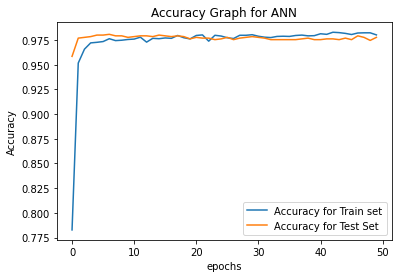

In [16]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

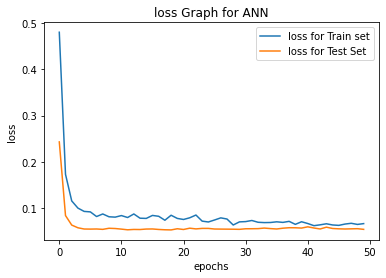

In [17]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [18]:
y_pred_ann = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [19]:
accuracy_score(y_test,y_pred_ann)

0.9776923076923076

Tree Method

DataSet according to tree method

In [31]:
rank2  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "Tree_based_method").set_index('Attributes_Names')

In [36]:
df_tree = df[rank2[0:6].index]

In [37]:
X_col =  df_tree
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 6)
Shape of testing data (1300, 6)


Random Forest

In [38]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9907692307692307

SVM

In [39]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9938461538461538

ANN

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(6,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

In [41]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 6)                 42        
_________________________________________________________________
batch_normalization_6 (Batch (None, 6)                 24        
_________________________________________________________________
dense_13 (Dense)             (None, 12)                84        
_________________________________________________________________
batch_normalization_7 (Batch (None, 12)                48        
_________________________________________________________________
dense_14 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [42]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 3s 6ms/step - loss: 0.4785 - accuracy: 0.7851 - val_loss: 0.3104 - val_accuracy: 0.9554
Epoch 2/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1871 - accuracy: 0.9469 - val_loss: 0.0822 - val_accuracy: 0.9785
Epoch 3/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1096 - accuracy: 0.9686 - val_loss: 0.0441 - val_accuracy: 0.9877
Epoch 4/50
163/163 [==============================] - 1s 3ms/step - loss: 0.0891 - accuracy: 0.9750 - val_loss: 0.0324 - val_accuracy: 0.9862
Epoch 5/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0775 - accuracy: 0.9788 - val_loss: 0.0290 - val_accuracy: 0.9885
Epoch 6/50
163/163 [==============================] - 1s 4ms/step - loss: 0.0653 - accuracy: 0.9835 - val_loss: 0.0272 - val_accuracy: 0.9877
Epoch 7/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0632 - accuracy: 0.9854 - val_loss: 0.0267 - val_accuracy: 0.9908
Epoch 

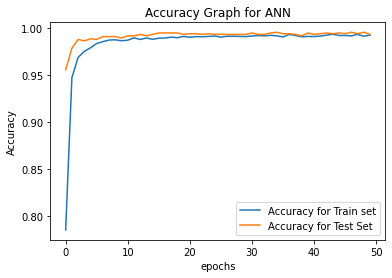

In [43]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

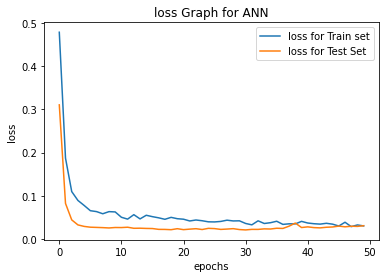

In [44]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [45]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9930769230769231

Permutation Mean Method

DataSet according permutation mean 

In [46]:
rank3  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "permutation_method_mean").set_index('Attributes_Names')

In [49]:
df_per_mean = df[rank3[0:6].index]

In [50]:
X_col =  df_per_mean
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 6)
Shape of testing data (1300, 6)


Random Forest

In [51]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9846153846153847

SVM

In [52]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.99

ANN

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(6,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 6)                 42        
_________________________________________________________________
batch_normalization_8 (Batch (None, 6)                 24        
_________________________________________________________________
dense_17 (Dense)             (None, 12)                84        
_________________________________________________________________
batch_normalization_9 (Batch (None, 12)                48        
_________________________________________________________________
dense_18 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [54]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 3s 8ms/step - loss: 0.4688 - accuracy: 0.7781 - val_loss: 0.2369 - val_accuracy: 0.9485
Epoch 2/50
163/163 [==============================] - 1s 6ms/step - loss: 0.1923 - accuracy: 0.9423 - val_loss: 0.1024 - val_accuracy: 0.9646
Epoch 3/50
163/163 [==============================] - 1s 4ms/step - loss: 0.1402 - accuracy: 0.9579 - val_loss: 0.0759 - val_accuracy: 0.9731
Epoch 4/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1195 - accuracy: 0.9627 - val_loss: 0.0638 - val_accuracy: 0.9754
Epoch 5/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1126 - accuracy: 0.9657 - val_loss: 0.0555 - val_accuracy: 0.9808
Epoch 6/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9729 - val_loss: 0.0504 - val_accuracy: 0.9846
Epoch 7/50
163/163 [==============================] - 1s 3ms/step - loss: 0.1004 - accuracy: 0.9686 - val_loss: 0.0482 - val_accuracy: 0.9862
Epoch 

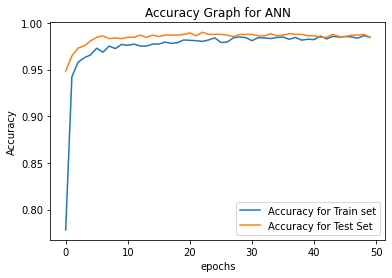

In [55]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

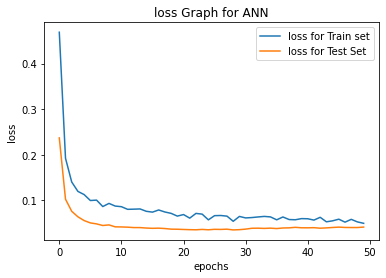

In [56]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [57]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9846153846153847

Permutation Method Standard Deviation

DataSet accoring to permutation std

In [61]:
rank4  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "permutation_method_std").set_index('Attributes_Names')
df_per_std  = df[rank4[0:6].index]

In [62]:
X_col =  df_per_std
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 6)
Shape of testing data (1300, 6)


Randpm Forest

In [63]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9838461538461538

SVM

In [64]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9823076923076923

ANN

In [65]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(6,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 6)                 42        
_________________________________________________________________
batch_normalization_10 (Batc (None, 6)                 24        
_________________________________________________________________
dense_21 (Dense)             (None, 12)                84        
_________________________________________________________________
batch_normalization_11 (Batc (None, 12)                48        
_________________________________________________________________
dense_22 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_5 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [66]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 2s 5ms/step - loss: 0.5980 - accuracy: 0.6821 - val_loss: 0.3094 - val_accuracy: 0.9700
Epoch 2/50
163/163 [==============================] - 1s 3ms/step - loss: 0.2247 - accuracy: 0.9450 - val_loss: 0.0936 - val_accuracy: 0.9754
Epoch 3/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1299 - accuracy: 0.9675 - val_loss: 0.0629 - val_accuracy: 0.9800
Epoch 4/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1162 - accuracy: 0.9708 - val_loss: 0.0567 - val_accuracy: 0.9823
Epoch 5/50
163/163 [==============================] - 0s 3ms/step - loss: 0.1101 - accuracy: 0.9709 - val_loss: 0.0564 - val_accuracy: 0.9777
Epoch 6/50
163/163 [==============================] - 1s 3ms/step - loss: 0.1055 - accuracy: 0.9731 - val_loss: 0.0546 - val_accuracy: 0.9792
Epoch 7/50
163/163 [==============================] - 0s 3ms/step - loss: 0.0987 - accuracy: 0.9729 - val_loss: 0.0537 - val_accuracy: 0.9785
Epoch 

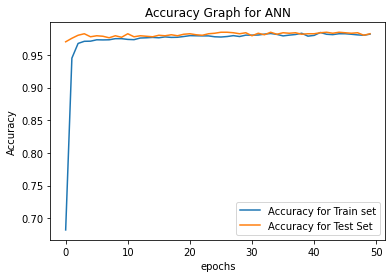

In [67]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

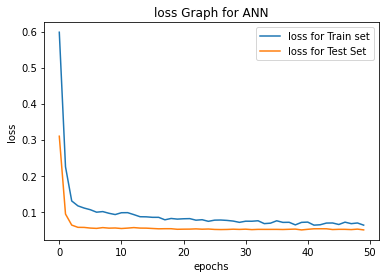

In [68]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [69]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9823076923076923

PCA

DataSet according to PCA

In [70]:
rank5  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "PCA").set_index('Attributes_Names')
df_pca  = df[rank5[:6].index]

In [71]:
X_col =  df_pca
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 6)
Shape of testing data (1300, 6)


Random Forest

In [72]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9892307692307692

SVM

In [73]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9946153846153846

ANN

In [74]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(6,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 6)                 42        
_________________________________________________________________
batch_normalization_12 (Batc (None, 6)                 24        
_________________________________________________________________
dense_25 (Dense)             (None, 12)                84        
_________________________________________________________________
batch_normalization_13 (Batc (None, 12)                48        
_________________________________________________________________
dense_26 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_6 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                

In [75]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8151 - val_loss: 0.2516 - val_accuracy: 0.9192
Epoch 2/50
163/163 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.9309 - val_loss: 0.0914 - val_accuracy: 0.9708
Epoch 3/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.9656 - val_loss: 0.0535 - val_accuracy: 0.9808
Epoch 4/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.9731 - val_loss: 0.0440 - val_accuracy: 0.9869
Epoch 5/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0829 - accuracy: 0.9781 - val_loss: 0.0414 - val_accuracy: 0.9869
Epoch 6/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9748 - val_loss: 0.0382 - val_accuracy: 0.9885
Epoch 7/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9811 - val_loss: 0.0381 - val_accuracy: 0.9908
Epoch 

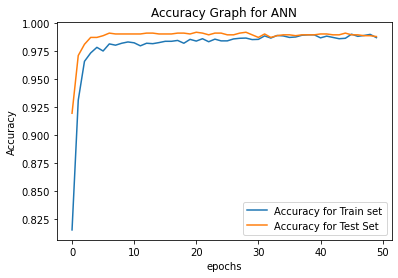

In [76]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

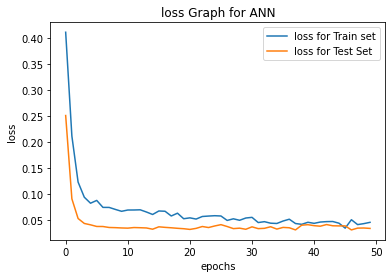

In [77]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [78]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9876923076923076

F Test

Dataset according to F test

In [85]:
rank6  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "F_test").set_index('Attributes_Names')
df_f_test  = df[rank6[:6].index]

In [86]:
X_col =  df_f_test
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 6)
Shape of testing data (1300, 6)


Random Forest

In [87]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9923076923076923

SVM

In [88]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9961538461538462

ANN

In [89]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(6,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 6)                 42        
_________________________________________________________________
batch_normalization_14 (Batc (None, 6)                 24        
_________________________________________________________________
dense_29 (Dense)             (None, 12)                84        
_________________________________________________________________
batch_normalization_15 (Batc (None, 12)                48        
_________________________________________________________________
dense_30 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_7 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                

In [90]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 1s 3ms/step - loss: 0.3891 - accuracy: 0.8439 - val_loss: 0.2292 - val_accuracy: 0.9492
Epoch 2/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1688 - accuracy: 0.9471 - val_loss: 0.0709 - val_accuracy: 0.9846
Epoch 3/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1159 - accuracy: 0.9617 - val_loss: 0.0442 - val_accuracy: 0.9877
Epoch 4/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.9706 - val_loss: 0.0337 - val_accuracy: 0.9846
Epoch 5/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0755 - accuracy: 0.9767 - val_loss: 0.0281 - val_accuracy: 0.9923
Epoch 6/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.9775 - val_loss: 0.0251 - val_accuracy: 0.9915
Epoch 7/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0653 - accuracy: 0.9808 - val_loss: 0.0236 - val_accuracy: 0.9908
Epoch 

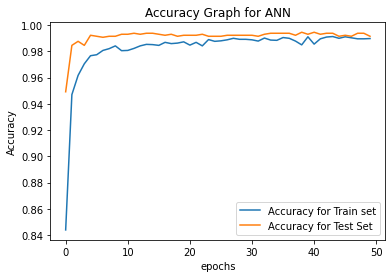

In [91]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

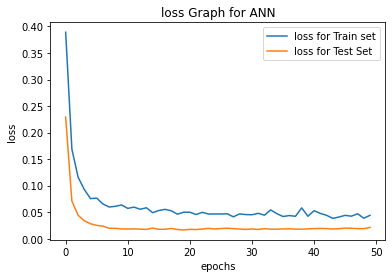

In [92]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [93]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9915384615384616

Mutual Info

Dataset according to Mutual info

In [95]:
rank7  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "mutual_info").set_index('Attributes_Names')
df_mutual = df[rank7[:6].index]

In [96]:
X_col =  df_mutual
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 6)
Shape of testing data (1300, 6)


Random Forest

In [97]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9946153846153846

SVM

In [98]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9938461538461538

ANN

In [99]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(6,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 6)                 42        
_________________________________________________________________
batch_normalization_16 (Batc (None, 6)                 24        
_________________________________________________________________
dense_33 (Dense)             (None, 12)                84        
_________________________________________________________________
batch_normalization_17 (Batc (None, 12)                48        
_________________________________________________________________
dense_34 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_8 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                

In [100]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 1s 3ms/step - loss: 0.4713 - accuracy: 0.7839 - val_loss: 0.2613 - val_accuracy: 0.9638
Epoch 2/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1805 - accuracy: 0.9644 - val_loss: 0.0796 - val_accuracy: 0.9831
Epoch 3/50
163/163 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.9748 - val_loss: 0.0420 - val_accuracy: 0.9885
Epoch 4/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0774 - accuracy: 0.9827 - val_loss: 0.0313 - val_accuracy: 0.9908
Epoch 5/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0702 - accuracy: 0.9848 - val_loss: 0.0294 - val_accuracy: 0.9915
Epoch 6/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9854 - val_loss: 0.0279 - val_accuracy: 0.9908
Epoch 7/50
163/163 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9873 - val_loss: 0.0278 - val_accuracy: 0.9908
Epoch 

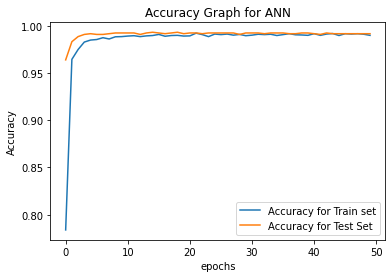

In [101]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

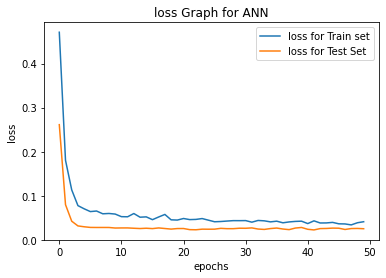

In [102]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [103]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9915384615384616

Pearson

DataSet according to pearson

In [105]:
rank8  = pd.read_excel("/content/Wine_dataset (1).xlsx",sheet_name = "Pearson_Correlation").set_index('Attributes_Names')
df_pearson =  df[rank8[:6].index]

In [106]:
X_col =  df_pearson
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 6)
Shape of testing data (1300, 6)


Random Forest

In [107]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf =  rf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9776923076923076

SVM

In [108]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred_svc =  svc.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.953076923076923

ANN

In [109]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(6,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 6)                 42        
_________________________________________________________________
batch_normalization_18 (Batc (None, 6)                 24        
_________________________________________________________________
dense_37 (Dense)             (None, 12)                84        
_________________________________________________________________
batch_normalization_19 (Batc (None, 12)                48        
_________________________________________________________________
dense_38 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_9 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 1)                

In [110]:
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
163/163 [==============================] - 2s 5ms/step - loss: 0.5622 - accuracy: 0.7314 - val_loss: 0.4111 - val_accuracy: 0.8346
Epoch 2/50
163/163 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.8447 - val_loss: 0.2630 - val_accuracy: 0.9062
Epoch 3/50
163/163 [==============================] - 1s 3ms/step - loss: 0.2957 - accuracy: 0.8822 - val_loss: 0.2120 - val_accuracy: 0.9200
Epoch 4/50
163/163 [==============================] - 0s 3ms/step - loss: 0.2673 - accuracy: 0.8997 - val_loss: 0.1858 - val_accuracy: 0.9292
Epoch 5/50
163/163 [==============================] - 0s 3ms/step - loss: 0.2335 - accuracy: 0.9175 - val_loss: 0.1690 - val_accuracy: 0.9369
Epoch 6/50
163/163 [==============================] - 0s 3ms/step - loss: 0.2204 - accuracy: 0.9203 - val_loss: 0.1578 - val_accuracy: 0.9400
Epoch 7/50
163/163 [==============================] - 1s 3ms/step - loss: 0.2248 - accuracy: 0.9201 - val_loss: 0.1525 - val_accuracy: 0.9446
Epoch 

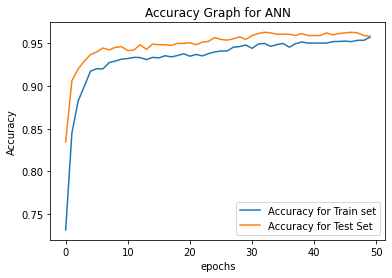

In [111]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

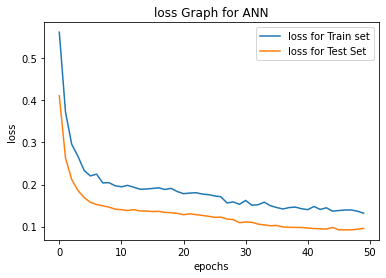

In [112]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [113]:
y_pred_ann = model.predict_classes(X_test)
accuracy_score(y_test,y_pred_ann)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9584615384615385

OWA

In [21]:
df_owa = df[['total_sulfur_dioxide','free_sulfur_dioxide','residual_sugar','fixed_acidity','volatile_acidity','sulphates']]

In [22]:
X_col =  df_owa
y = LabelEncoder().fit_transform(df['style'])
Scaler = StandardScaler()
X_col =  Scaler.fit_transform(X_col)
X_train, X_test, y_train, y_test = train_test_split(X_col, y, test_size=0.2, random_state=0)
print("Shape of training data",X_train.shape)
print("Shape of testing data",X_test.shape)

Shape of training data (5197, 6)
Shape of testing data (1300, 6)


Random Forest OWA

In [23]:
rf =  RandomForestClassifier()
rf.fit(X_train,y_train)
pred =  rf.predict(X_test)
accuracy_score(y_test,pred)

0.9823076923076923

SVM OWA

In [24]:
svc =  SVC()
svc.fit(X_test,y_test)
y_pred =  svc.predict(X_test)
accuracy_score(y_test,y_pred)

0.9823076923076923

ANN OWA

In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu', input_shape=(6,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
model.summary()
h = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 42        
_________________________________________________________________
batch_normalization_4 (Batch (None, 6)                 24        
_________________________________________________________________
dense_9 (Dense)              (None, 12)                84        
_________________________________________________________________
batch_normalization_5 (Batch (None, 12)                48        
_________________________________________________________________
dense_10 (Dense)             (None, 24)                312       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

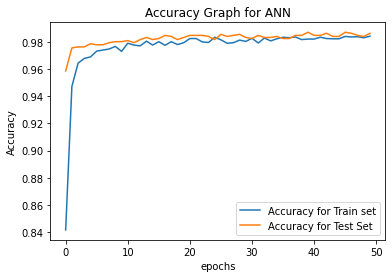

In [29]:
plt.plot(h.history['accuracy'], label = 'Accuracy for Train set')
plt.plot(h.history['val_accuracy'], label = 'Accuracy for Test Set')
plt.title('Accuracy Graph for ANN')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend()

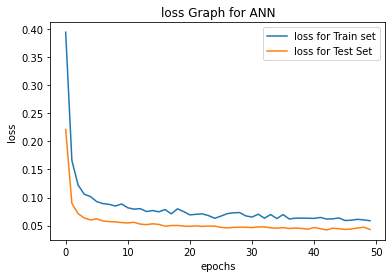

In [30]:
plt.plot(h.history['loss'], label = 'loss for Train set')
plt.plot(h.history['val_loss'], label = 'loss for Test Set')
plt.title('loss Graph for ANN')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()

In [27]:
y_pred_ann_owa = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
accuracy_score(y_test,y_pred_ann_owa)

0.9861538461538462